# CS:GO Data Preparation & Exploratory Data Analysis

**Objetivo:** Preparar y analizar profundamente el dataset CS:GO para Machine Learning

**Dataset:** 79,157 registros de 333 partidas CS:GO  
**Metodología:** CRISP-DM - Data Preparation Phase

---

In [ ]:
dataset = df

## 1. Importación de Librerías y Configuración

In [2]:
# Librerías principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# Configuración
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Configuración de gráficos
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("Librerías importadas exitosamente")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")

Librerías importadas exitosamente
Pandas version: 2.2.3
Matplotlib version: 3.10.3


In [4]:
data_path = r"C:\Users\LuisSalamanca\Desktop\Duoc\Machine\csgo-ml\data\04_feature\csgo_data_with_features.csv"
df_raw = pd.read_csv(data_path, sep=';', low_memory=False)

In [5]:
dataset = df_raw['EffectivenessLevel','RoundKills','RoundHeadshots', 
        'TeamStartingEquipmentValue', 
        'MatchAssists', 
        'MatchHeadshots']

KeyError: ('EffectivenessLevel', 'RoundKills', 'RoundHeadshots', 'TeamStartingEquipmentValue', 'MatchAssists', 'MatchHeadshots')

## 2. Carga y Primera Inspección de Datos

In [77]:
# Carga de datos
data_path = r"..\data\01_raw\Anexo_ET_demo_round_traces_2022.csv"
df_raw = pd.read_csv(data_path, sep=';', low_memory=False)

print(f"Dataset cargado: {df_raw.shape[0]:,} filas × {df_raw.shape[1]} columnas")
print(f"Memoria utilizada: {df_raw.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Información básica
print("\nInformación del Dataset:")
df_raw.info()

Dataset cargado: 79,157 filas × 30 columnas
Memoria utilizada: 47.28 MB

Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79155 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   RoundWinner                  79157 non-null  object 
 7   MatchWinner                  79156 non-null  object 
 8   Survived                     79157 non-null  bool   
 9   AbnormalMatch                79157 non-null  bool   
 10  TimeAlive                    79157 non-null  object 
 11  TravelledDistance            79157

In [78]:
# Vista previa de los datos
print("Primeras 5 filas del dataset:")
display(df_raw.head())

print("\nÚltimas 5 filas del dataset:")
display(df_raw.tail())

Primeras 5 filas del dataset:


,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,51.120.248.995.704.500,10.083.140.737.457.000,0,4,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,4.348.662.552.266.170,60.960.883.184.688.400,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,3.735.469.847.054.540,5.642.252.383.582.750,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,4.767.886.136.441.470,8.963.473.313.229.970,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,5.312.251.089.027.310,10.865.649.734.393.100,1,1,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0



Últimas 5 filas del dataset:


,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
79152,123775,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,340.272.074.099.723,4.048.177.852.924.460,1,1,1.0,0.0,0.0,0.0,0,2.277.596,0,0,0,0,5600,27100,4,0,2,2
79153,123776,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,2.926.105.436.288.080,3.213.477.612.567.870,0,0,1.0,0.0,0.0,0.0,0,28.714.119,1,0,1,0,5500,27100,8,5,1,3
79154,123777,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,5.914.717.797.783.930,6.005.168.938.274.500,1,1,1.0,0.0,0.0,0.0,0,297.689.228,0,0,0,0,4950,27100,5,0,2,3
79155,123778,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,42.582.842.797.783.900,27.987.628.542.398.100,0,2,0.0,1.0,0.0,0.0,0,7.528.178,0,0,0,0,4950,27100,1,0,1,0
79156,123779,de_mirage,CounterTerrorist,2,511,5,False,False,True,False,8.004.793.109.418.280,9.867.724.708.696.010,2,1,1.0,0.0,0.0,0.0,0,438.720.474,4,0,2,0,6100,27100,5,1,1,2


## 3. Identificación de Problemas de Calidad de Datos

Análisis de Tipos de Datos:
Distribución de tipos:
  int64: 17 columnas
  object: 7 columnas
  float64: 4 columnas
  bool: 2 columnas


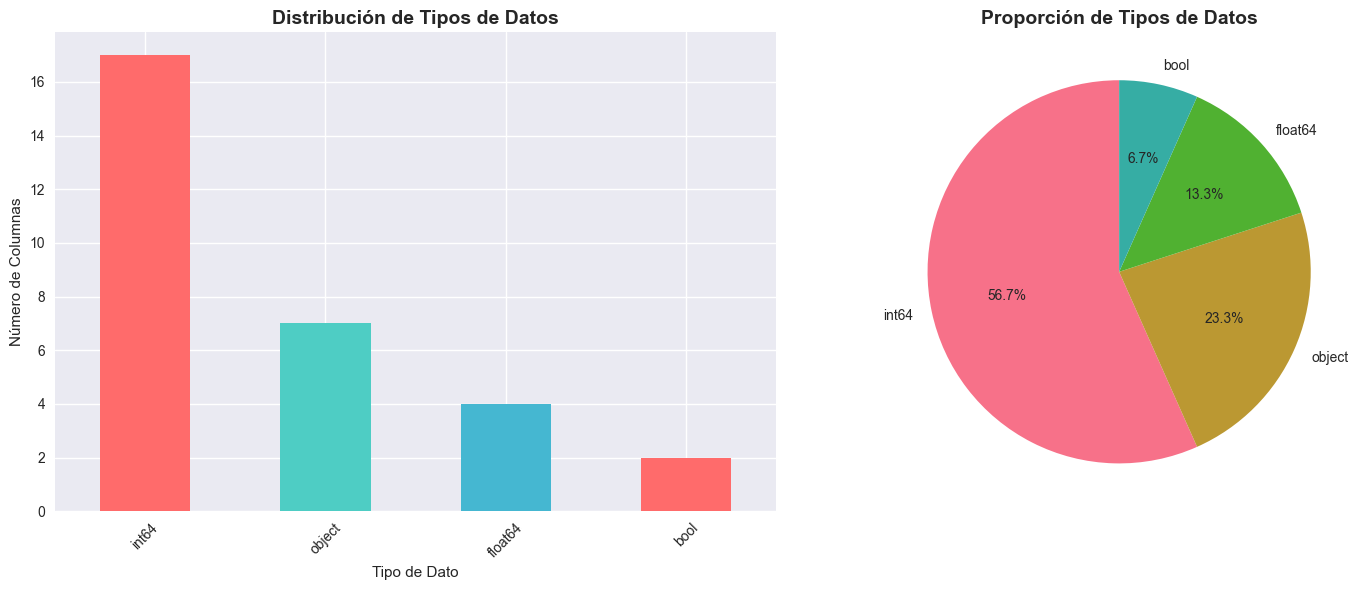

In [79]:
# Análisis de tipos de datos
print("Análisis de Tipos de Datos:")
print("="*50)

data_types = df_raw.dtypes.value_counts()
print(f"Distribución de tipos:")
for dtype, count in data_types.items():
    print(f"  {dtype}: {count} columnas")

# Visualización de tipos de datos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras de tipos
data_types.plot(kind='bar', ax=ax1, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
ax1.set_title('Distribución de Tipos de Datos', fontsize=14, fontweight='bold')
ax1.set_xlabel('Tipo de Dato')
ax1.set_ylabel('Número de Columnas')
ax1.tick_params(axis='x', rotation=45)

# Gráfico circular
data_types.plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90)
ax2.set_title('Proporción de Tipos de Datos', fontsize=14, fontweight='bold')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()

In [80]:
# Identificación de columnas problemáticas
print("COLUMNAS PROBLEMÁTICAS IDENTIFICADAS:")
print("="*60)

problematic_cols = ['TimeAlive', 'TravelledDistance', 'FirstKillTime', 'Unnamed: 0', 'MatchId']

for col in problematic_cols:
    if col in df_raw.columns:
        print(f"\n{col}:")
        sample_values = df_raw[col].head(5).values
        print(f"   Ejemplos: {sample_values}")
        print(f"   Problema: Formato europeo con múltiples puntos")
        print(f"   Estado: ELIMINAR (no convertible)")

# Columnas con valores inconsistentes
print(f"\nRoundWinner valores únicos: {df_raw['RoundWinner'].unique()}")
print(f"MatchWinner valores únicos: {df_raw['MatchWinner'].unique()}")
print(f"MatchWinner nulos: {df_raw['MatchWinner'].isnull().sum()}")

COLUMNAS PROBLEMÁTICAS IDENTIFICADAS:

TimeAlive:
   Ejemplos: ['51.120.248.995.704.500' '4.348.662.552.266.170' '3.735.469.847.054.540'
 '4.767.886.136.441.470' '5.312.251.089.027.310']
   Problema: Formato europeo con múltiples puntos
   Estado: ELIMINAR (no convertible)

TravelledDistance:
   Ejemplos: ['10.083.140.737.457.000' '60.960.883.184.688.400' '5.642.252.383.582.750'
 '8.963.473.313.229.970' '10.865.649.734.393.100']
   Problema: Formato europeo con múltiples puntos
   Estado: ELIMINAR (no convertible)

FirstKillTime:
   Ejemplos: ['0.0' '0.0' '0.0' '0.0' '0.0']
   Problema: Formato europeo con múltiples puntos
   Estado: ELIMINAR (no convertible)

Unnamed: 0:
   Ejemplos: [600 601 602 603 604]
   Problema: Formato europeo con múltiples puntos
   Estado: ELIMINAR (no convertible)

MatchId:
   Ejemplos: [4 4 4 4 4]
   Problema: Formato europeo con múltiples puntos
   Estado: ELIMINAR (no convertible)

RoundWinner valores únicos: ['False' 'True' 'False4']
MatchWinner valores 

## 4. Limpieza Inicial de Datos

In [81]:
# Crear copia para limpieza
df_clean = df_raw.copy()

print("INICIANDO LIMPIEZA DE DATOS")
print("="*40)

# 1. Eliminar columnas problemáticas
cols_to_drop = ['TimeAlive', 'TravelledDistance', 'FirstKillTime', 'AbnormalMatch', 'Unnamed: 0', 'MatchId']
cols_dropped = [col for col in cols_to_drop if col in df_clean.columns]
df_clean = df_clean.drop(columns=cols_dropped)

print(f"Columnas eliminadas: {cols_dropped}")
print(f"Shape después de eliminar: {df_clean.shape}")

# 2. Limpiar RoundWinner
print(f"\nLimpiando RoundWinner:")
print(f"   Antes: {df_clean['RoundWinner'].value_counts().to_dict()}")

# Mapear 'False4' a False
df_clean['RoundWinner'] = df_clean['RoundWinner'].replace('False4', 'False')
# Convertir a booleano
df_clean['RoundWinner'] = (
    df_clean['RoundWinner']
    .astype(str)
    .str.strip()
    .str.lower()
    .map({'true': True, 'false': False, '1': True, '0': False})
)

print(f"   Después: {df_clean['RoundWinner'].value_counts().to_dict()}")

# 3. Limpiar MatchWinner
print(f"\nLimpiando MatchWinner:")
print(f"   Nulos antes: {df_clean['MatchWinner'].isnull().sum()}")

# Eliminar filas con MatchWinner nulo (solo 1 fila)
df_clean = df_clean.dropna(subset=['MatchWinner'])

# Convertir a booleano
df_clean['MatchWinner'] = (
    df_clean['MatchWinner']
    .astype(str)
    .str.strip()
    .str.lower()
    .map({'true': True, 'false': False, '1': True, '0': False})
)

print(f"   Nulos después: {df_clean['MatchWinner'].isnull().sum()}")
print(f"   Distribución: {df_clean['MatchWinner'].value_counts().to_dict()}")

# 4. Eliminar filas con Team nulo
print(f"\nEliminando filas con Team nulo:")
print(f"   Nulos antes: {df_clean['Team'].isnull().sum()}")
df_clean = df_clean.dropna(subset=['Team'])
print(f"   Nulos después: {df_clean['Team'].isnull().sum()}")

print(f"\nLimpieza inicial completada")
print(f"Shape final: {df_clean.shape}")

INICIANDO LIMPIEZA DE DATOS
Columnas eliminadas: ['TimeAlive', 'TravelledDistance', 'FirstKillTime', 'AbnormalMatch', 'Unnamed: 0', 'MatchId']
Shape después de eliminar: (79157, 24)

Limpiando RoundWinner:
   Antes: {'False': 39588, 'True': 39568, 'False4': 1}
   Después: {False: 39589, True: 39568}

Limpiando MatchWinner:
   Nulos antes: 1
   Nulos después: 0
   Distribución: {False: 42017, True: 37139}

Eliminando filas con Team nulo:
   Nulos antes: 2
   Nulos después: 0

Limpieza inicial completada
Shape final: (79154, 24)


## 5. Análisis de Valores Nulos y Duplicados

In [82]:
# Análisis de valores nulos
null_analysis = pd.DataFrame({
    'Column': df_clean.columns,
    'Null_Count': df_clean.isnull().sum(),
    'Null_Percentage': (df_clean.isnull().sum() / len(df_clean)) * 100
})
null_analysis = null_analysis[null_analysis['Null_Count'] > 0].sort_values('Null_Count', ascending=False)

print("ANÁLISIS DE VALORES NULOS:")
print("="*40)

if len(null_analysis) > 0:
    display(null_analysis)
    
    # Visualización de nulos
    plt.figure(figsize=(12, 6))
    sns.barplot(data=null_analysis, x='Column', y='Null_Count', palette='Reds_r')
    plt.title('Distribución de Valores Nulos por Columna', fontsize=14, fontweight='bold')
    plt.xlabel('Columnas')
    plt.ylabel('Cantidad de Nulos')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No hay valores nulos en el dataset")

# Análisis de duplicados
print(f"\nANÁLISIS DE DUPLICADOS:")
print("="*30)

duplicates = df_clean.duplicated().sum()
print(f"Filas duplicadas exactas: {duplicates}")

if duplicates > 0:
    print(f"Porcentaje de duplicados: {(duplicates/len(df_clean))*100:.2f}%")
    
    # Mostrar ejemplos de duplicados
    duplicate_rows = df_clean[df_clean.duplicated(keep=False)]
    print(f"\nEjemplos de filas duplicadas:")
    display(duplicate_rows.head(10))
else:
    print("No hay filas duplicadas en el dataset")

ANÁLISIS DE VALORES NULOS:
No hay valores nulos en el dataset

ANÁLISIS DE DUPLICADOS:
Filas duplicadas exactas: 1448
Porcentaje de duplicados: 1.83%

Ejemplos de filas duplicadas:


,Map,Team,InternalTeamId,RoundId,RoundWinner,MatchWinner,Survived,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
3,de_inferno,Terrorist,1,1,False,True,False,0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,850,4400,0,0,0,0
10,de_inferno,Terrorist,1,2,True,True,True,0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,300,1300,0,0,0,0
12,de_inferno,Terrorist,1,2,True,True,False,0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,300,1300,0,0,0,0
14,de_inferno,Terrorist,1,2,True,True,False,0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,200,1300,0,0,0,0
20,de_inferno,Terrorist,1,3,True,True,False,0,2,0.0,0.0,0.0,0.0,1,0,0,0,0,500,2000,0,0,0,0
21,de_inferno,Terrorist,1,3,True,True,False,0,2,0.0,0.0,0.0,0.0,1,0,0,0,0,500,2000,0,0,0,0
31,de_inferno,Terrorist,1,4,True,True,False,0,0,1.0,0.0,0.0,0.0,0,0,0,0,0,4700,23350,0,0,0,0
32,de_inferno,Terrorist,1,4,True,True,False,0,0,1.0,0.0,0.0,0.0,0,0,0,0,0,4700,23350,0,0,0,0
252,de_nuke,Terrorist,1,3,True,True,True,0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,200,2150,0,0,0,0
253,de_nuke,Terrorist,1,3,True,True,True,0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,200,2150,0,0,0,0


## 6. Análisis Exploratorio de Variables Categóricas

ANÁLISIS DE VARIABLES CATEGÓRICAS:

Map:


   Valores únicos: 4
   Distribución: {'de_inferno': 28866, 'de_dust2': 19120, 'de_mirage': 19019, 'de_nuke': 12149}

Team:
   Valores únicos: 2
   Distribución: {'Terrorist': 39591, 'CounterTerrorist': 39563}

InternalTeamId:
   Valores únicos: 2
   Distribución: {1: 39577, 2: 39577}

RoundWinner:
   Valores únicos: 2
   Distribución: {False: 39587, True: 39567}

MatchWinner:
   Valores únicos: 2
   Distribución: {False: 42016, True: 37138}

Survived:
   Valores únicos: 2
   Distribución: {False: 47213, True: 31941}


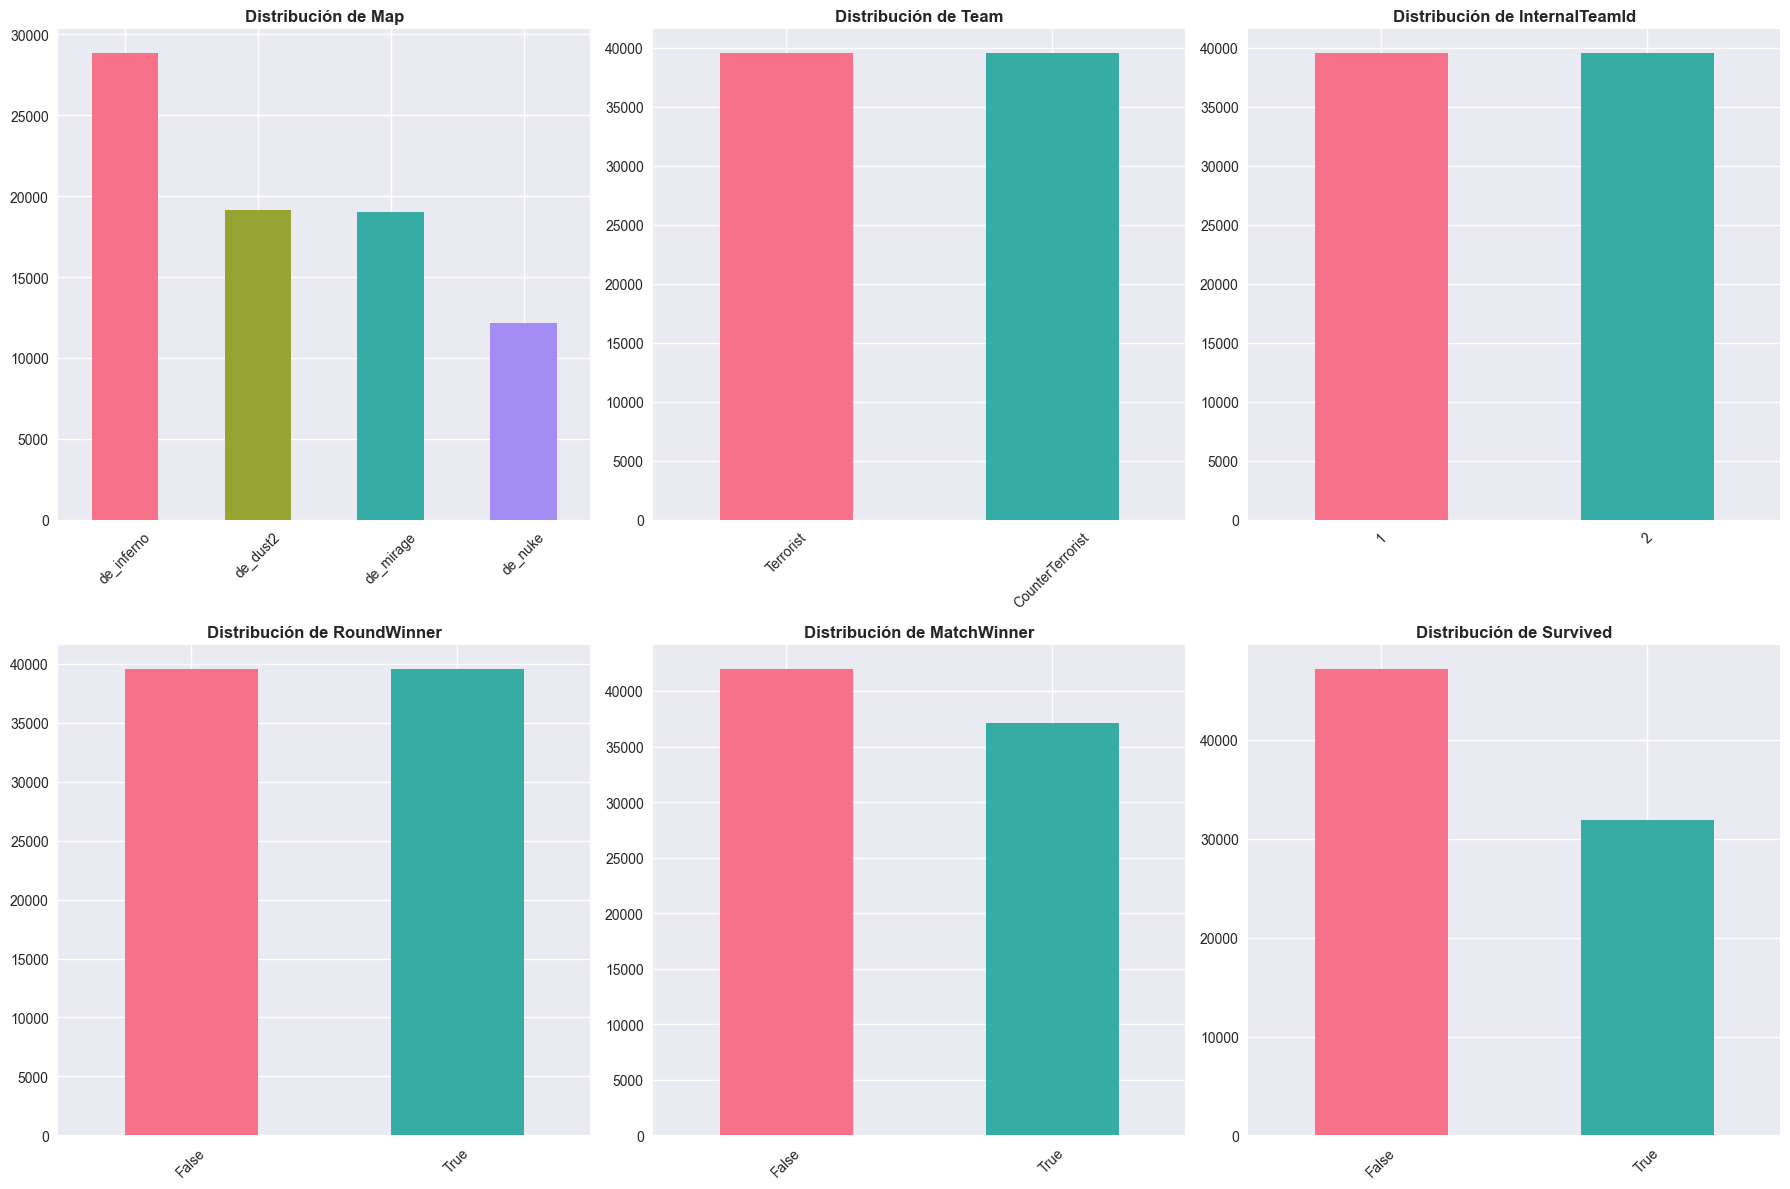

In [83]:
# Identificar variables categóricas
categorical_cols = ['Map', 'Team', 'InternalTeamId', 'RoundWinner', 'MatchWinner', 'Survived']

print("ANÁLISIS DE VARIABLES CATEGÓRICAS:")
print("="*45)

# Crear subplots para visualizaciones
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    if col in df_clean.columns:
        # Contar valores
        value_counts = df_clean[col].value_counts()
        
        print(f"\n{col}:")
        print(f"   Valores únicos: {df_clean[col].nunique()}")
        print(f"   Distribución: {value_counts.to_dict()}")
        
        # Visualización
        if len(value_counts) <= 10:  # Bar plot para pocas categorías
            value_counts.plot(kind='bar', ax=axes[i], color=sns.color_palette("husl", len(value_counts)))
            axes[i].set_title(f'Distribución de {col}', fontweight='bold')
            axes[i].set_xlabel('')
            axes[i].tick_params(axis='x', rotation=45)
        else:  # Pie chart para muchas categorías
            value_counts.head(8).plot(kind='pie', ax=axes[i], autopct='%1.1f%%')
            axes[i].set_title(f'Top 8 {col}', fontweight='bold')
            axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

ANÁLISIS CRUZADO DE VARIABLES CATEGÓRICAS:

Distribución de Equipos por Mapa:


Team,CounterTerrorist,Terrorist
Map,,
de_dust2,50.0,50.0
de_inferno,50.0,50.0
de_mirage,50.0,50.0
de_nuke,49.9,50.1



Tasa de Supervivencia por Mapa:
   de_dust2: 40.2%
   de_inferno: 40.4%
   de_mirage: 40.3%
   de_nuke: 40.6%


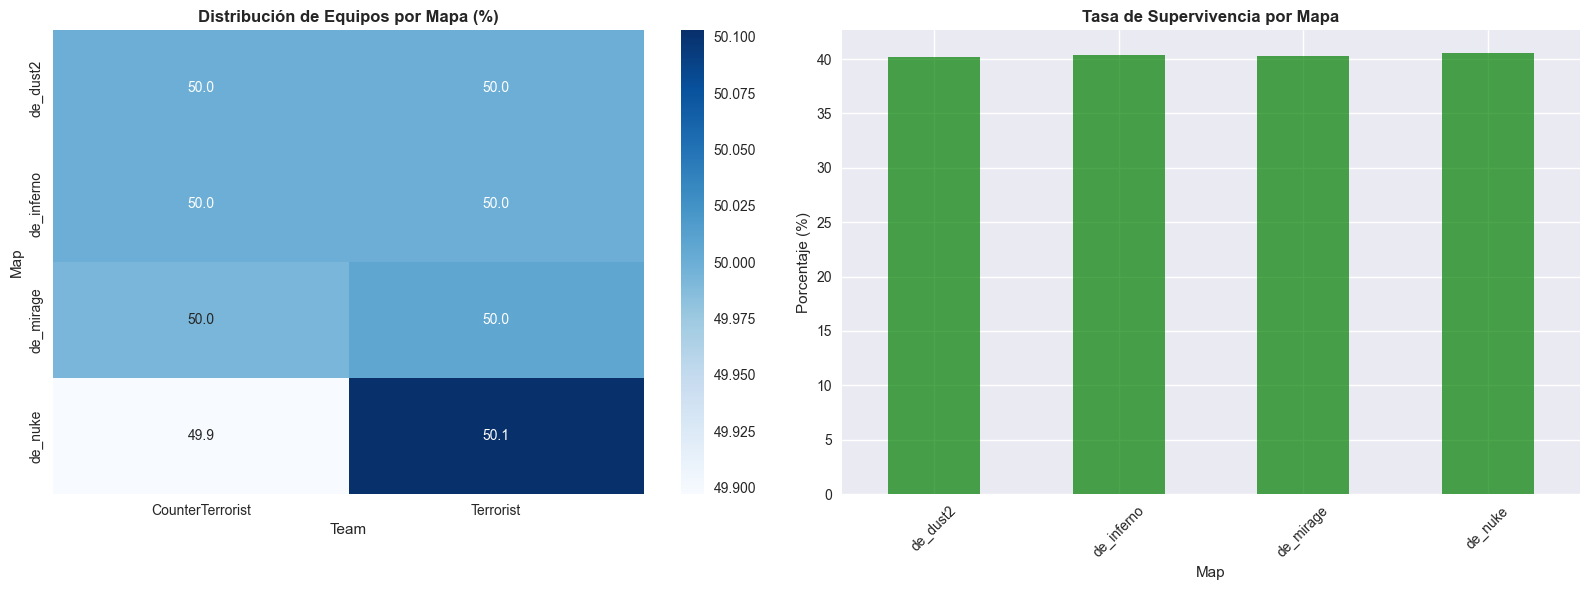

In [84]:
# Análisis cruzado de variables categóricas importantes
print("ANÁLISIS CRUZADO DE VARIABLES CATEGÓRICAS:")
print("="*50)

# 1. Map vs Team performance
map_team_crosstab = pd.crosstab(df_clean['Map'], df_clean['Team'], normalize='index') * 100
print("\nDistribución de Equipos por Mapa:")
display(map_team_crosstab.round(1))

# 2. Survival rate por Map
if 'Survived' in df_clean.columns:
    survival_by_map = df_clean.groupby('Map')['Survived'].apply(lambda x: (x == True).sum() / len(x) * 100)
    print("\nTasa de Supervivencia por Mapa:")
    for map_name, rate in survival_by_map.items():
        print(f"   {map_name}: {rate:.1f}%")

# Visualización del análisis cruzado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap Map vs Team
sns.heatmap(map_team_crosstab, annot=True, fmt='.1f', ax=ax1, cmap='Blues')
ax1.set_title('Distribución de Equipos por Mapa (%)', fontweight='bold')

# Bar plot Survival by Map
if 'Survived' in df_clean.columns:
    survival_by_map.plot(kind='bar', ax=ax2, color='green', alpha=0.7)
    ax2.set_title('Tasa de Supervivencia por Mapa', fontweight='bold')
    ax2.set_ylabel('Porcentaje (%)')
    ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 7. Análisis de Variables Numéricas

ANÁLISIS DE VARIABLES NUMÉRICAS (17 variables):

Estadísticas Descriptivas:


,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
count,79154.0,79154.00,79154.00,79154.00,79154.00,79154.00,79154.00,79154.00,79154.00,79154.00,79154.00,79154.00,79154.00,79154.00,79154.00,79154.00,79154.00
mean,0.5,1.26,0.68,0.09,0.01,0.01,0.22,0.67,0.15,0.30,0.10,3778.15,18890.26,8.51,1.21,1.87,3.86
std,0.6,1.18,0.46,0.28,0.08,0.08,0.42,0.88,0.39,0.58,0.32,2111.29,9743.17,6.20,1.44,1.82,3.25
min,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1600.00,10900.00,3.00,0.00,0.00,1.00
50%,0.0,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4700.00,22550.00,8.00,1.00,1.00,3.00
75%,1.0,2.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,5200.00,26050.00,13.00,2.00,3.00,6.00
max,4.0,6.00,1.00,1.00,1.00,1.00,1.00,5.00,4.00,5.00,5.00,8850.00,36150.00,41.00,11.00,14.00,22.00


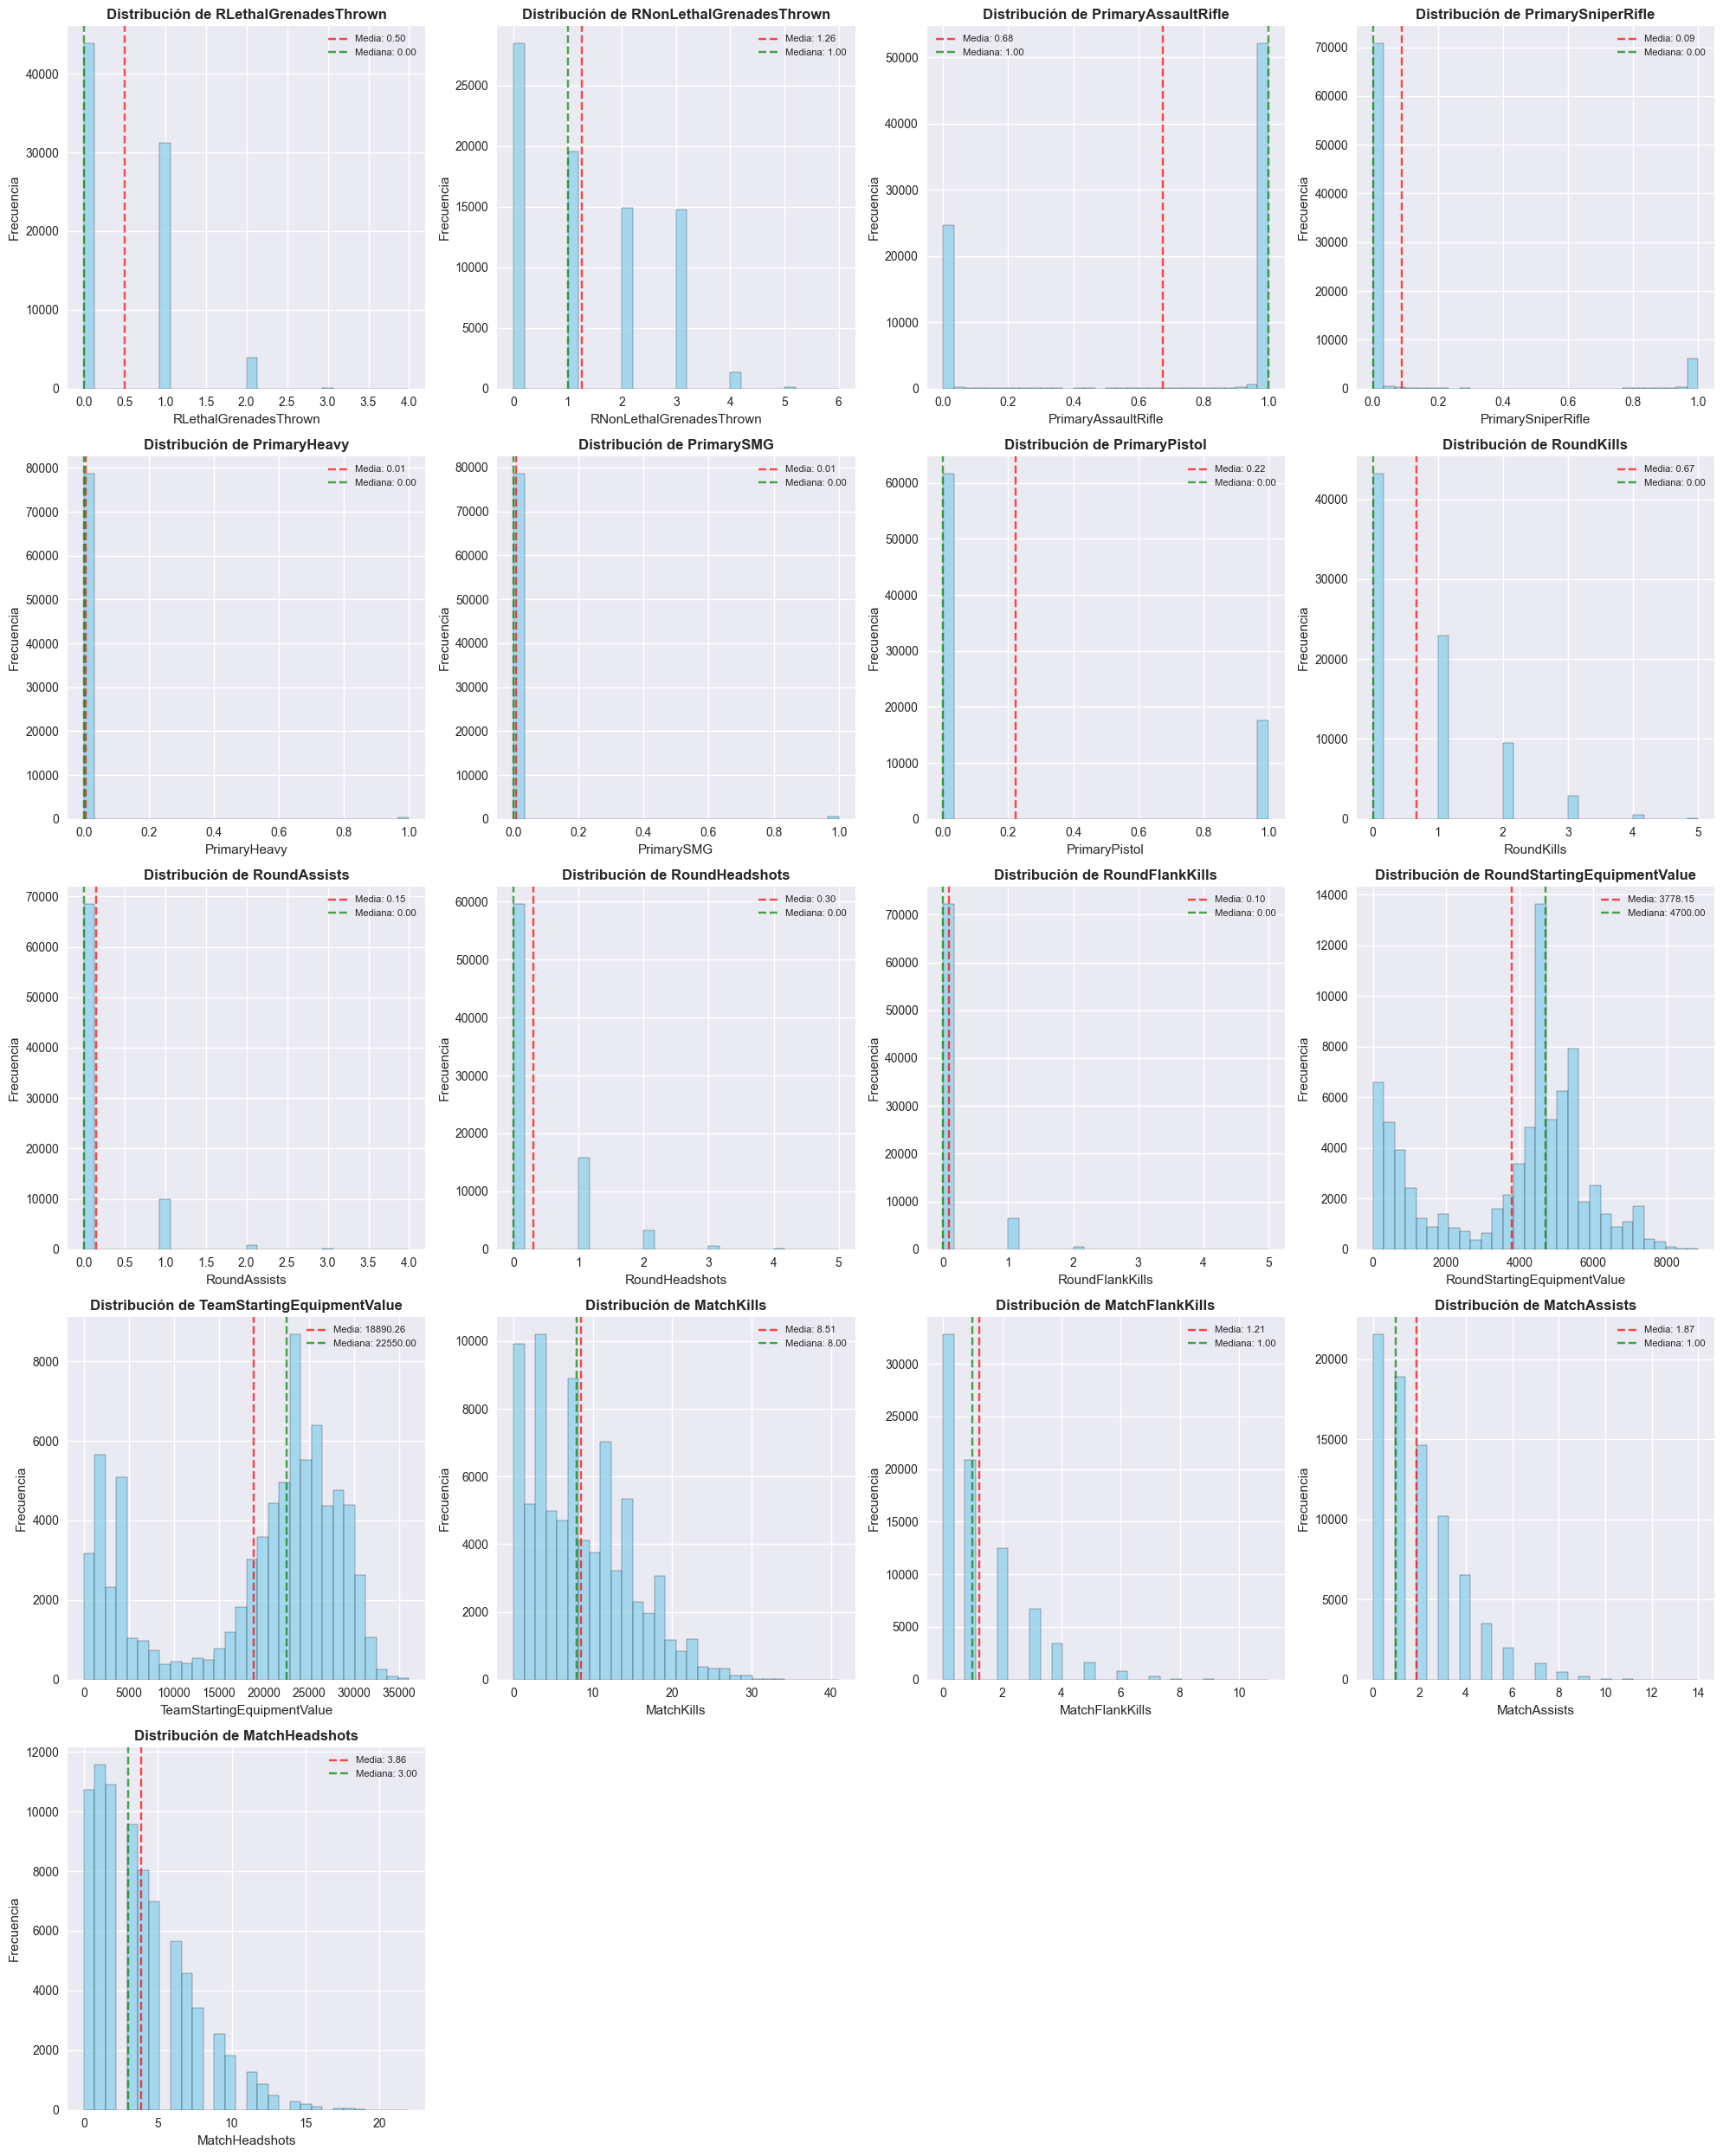

In [85]:
# Identificar variables numéricas
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
# Excluir IDs
numeric_cols = [col for col in numeric_cols if 'Id' not in col and 'Unnamed' not in col]

print(f"ANÁLISIS DE VARIABLES NUMÉRICAS ({len(numeric_cols)} variables):")
print("="*60)

# Estadísticas descriptivas
print("\nEstadísticas Descriptivas:")
descriptive_stats = df_clean[numeric_cols].describe()
display(descriptive_stats.round(2))

# Visualización de distribuciones
n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
if n_rows == 1:
    axes = axes.reshape(1, -1)

for i, col in enumerate(numeric_cols):
    row = i // n_cols
    col_idx = i % n_cols
    
    # Histograma con KDE
    df_clean[col].hist(bins=30, alpha=0.7, ax=axes[row, col_idx], color='skyblue', edgecolor='black')
    axes[row, col_idx].set_title(f'Distribución de {col}', fontweight='bold')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frecuencia')
    
    # Añadir estadísticas básicas al gráfico
    mean_val = df_clean[col].mean()
    median_val = df_clean[col].median()
    axes[row, col_idx].axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Media: {mean_val:.2f}')
    axes[row, col_idx].axvline(median_val, color='green', linestyle='--', alpha=0.7, label=f'Mediana: {median_val:.2f}')
    axes[row, col_idx].legend(fontsize=8)

# Ocultar subplots vacíos
for i in range(len(numeric_cols), n_rows * n_cols):
    row = i // n_cols
    col_idx = i % n_cols
    axes[row, col_idx].set_visible(False)

plt.tight_layout()
plt.show()

## 8. Detección y Análisis de Outliers

In [86]:
# Detección de outliers usando método IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("DETECCIÓN DE OUTLIERS (Método IQR):")
print("="*50)

outlier_summary = []

for col in numeric_cols:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(df_clean, col)
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df_clean)) * 100
    
    outlier_summary.append({
        'Column': col,
        'Outlier_Count': outlier_count,
        'Outlier_Percentage': outlier_percentage,
        'Lower_Bound': lower_bound,
        'Upper_Bound': upper_bound,
        'Min_Value': df_clean[col].min(),
        'Max_Value': df_clean[col].max()
    })
    
    if outlier_percentage > 0:
        print(f"\n{col}:")
        print(f"   Outliers: {outlier_count:,} ({outlier_percentage:.2f}%)")
        print(f"   Rango normal: [{lower_bound:.2f}, {upper_bound:.2f}]")
        print(f"   Rango real: [{df_clean[col].min():.2f}, {df_clean[col].max():.2f}]")

# Crear DataFrame con resumen de outliers
outlier_df = pd.DataFrame(outlier_summary)
outlier_df = outlier_df[outlier_df['Outlier_Percentage'] > 0].sort_values('Outlier_Percentage', ascending=False)

print(f"\nResumen de Outliers:")
display(outlier_df.round(2))

DETECCIÓN DE OUTLIERS (Método IQR):

RLethalGrenadesThrown:
   Outliers: 98 (0.12%)
   Rango normal: [-1.50, 2.50]
   Rango real: [0.00, 4.00]

RNonLethalGrenadesThrown:
   Outliers: 15 (0.02%)
   Rango normal: [-3.00, 5.00]
   Rango real: [0.00, 6.00]

PrimarySniperRifle:
   Outliers: 9,570 (12.09%)
   Rango normal: [0.00, 0.00]
   Rango real: [0.00, 1.00]

PrimaryHeavy:
   Outliers: 561 (0.71%)
   Rango normal: [0.00, 0.00]
   Rango real: [0.00, 1.00]

PrimarySMG:
   Outliers: 655 (0.83%)
   Rango normal: [0.00, 0.00]
   Rango real: [0.00, 1.00]

PrimaryPistol:
   Outliers: 17,555 (22.18%)
   Rango normal: [0.00, 0.00]
   Rango real: [0.00, 1.00]

RoundKills:
   Outliers: 3,505 (4.43%)
   Rango normal: [-1.50, 2.50]
   Rango real: [0.00, 5.00]

RoundAssists:
   Outliers: 10,692 (13.51%)
   Rango normal: [0.00, 0.00]
   Rango real: [0.00, 4.00]

RoundHeadshots:
   Outliers: 19,582 (24.74%)
   Rango normal: [0.00, 0.00]
   Rango real: [0.00, 5.00]

RoundFlankKills:
   Outliers: 6,962 (

,Column,Outlier_Count,Outlier_Percentage,Lower_Bound,Upper_Bound,Min_Value,Max_Value
9,RoundHeadshots,19582,24.74,0.0,0.0,0.0,5.0
6,PrimaryPistol,17555,22.18,0.0,0.0,0.0,1.0
8,RoundAssists,10692,13.51,0.0,0.0,0.0,4.0
3,PrimarySniperRifle,9570,12.09,0.0,0.0,0.0,1.0
10,RoundFlankKills,6962,8.80,0.0,0.0,0.0,5.0
7,RoundKills,3505,4.43,-1.5,2.5,0.0,5.0
14,MatchFlankKills,1184,1.50,-3.0,5.0,0.0,11.0
15,MatchAssists,781,0.99,-4.5,7.5,0.0,14.0
16,MatchHeadshots,724,0.91,-6.5,13.5,0.0,22.0
5,PrimarySMG,655,0.83,0.0,0.0,0.0,1.0


VISUALIZACIÓN DE OUTLIERS - BOXPLOTS:


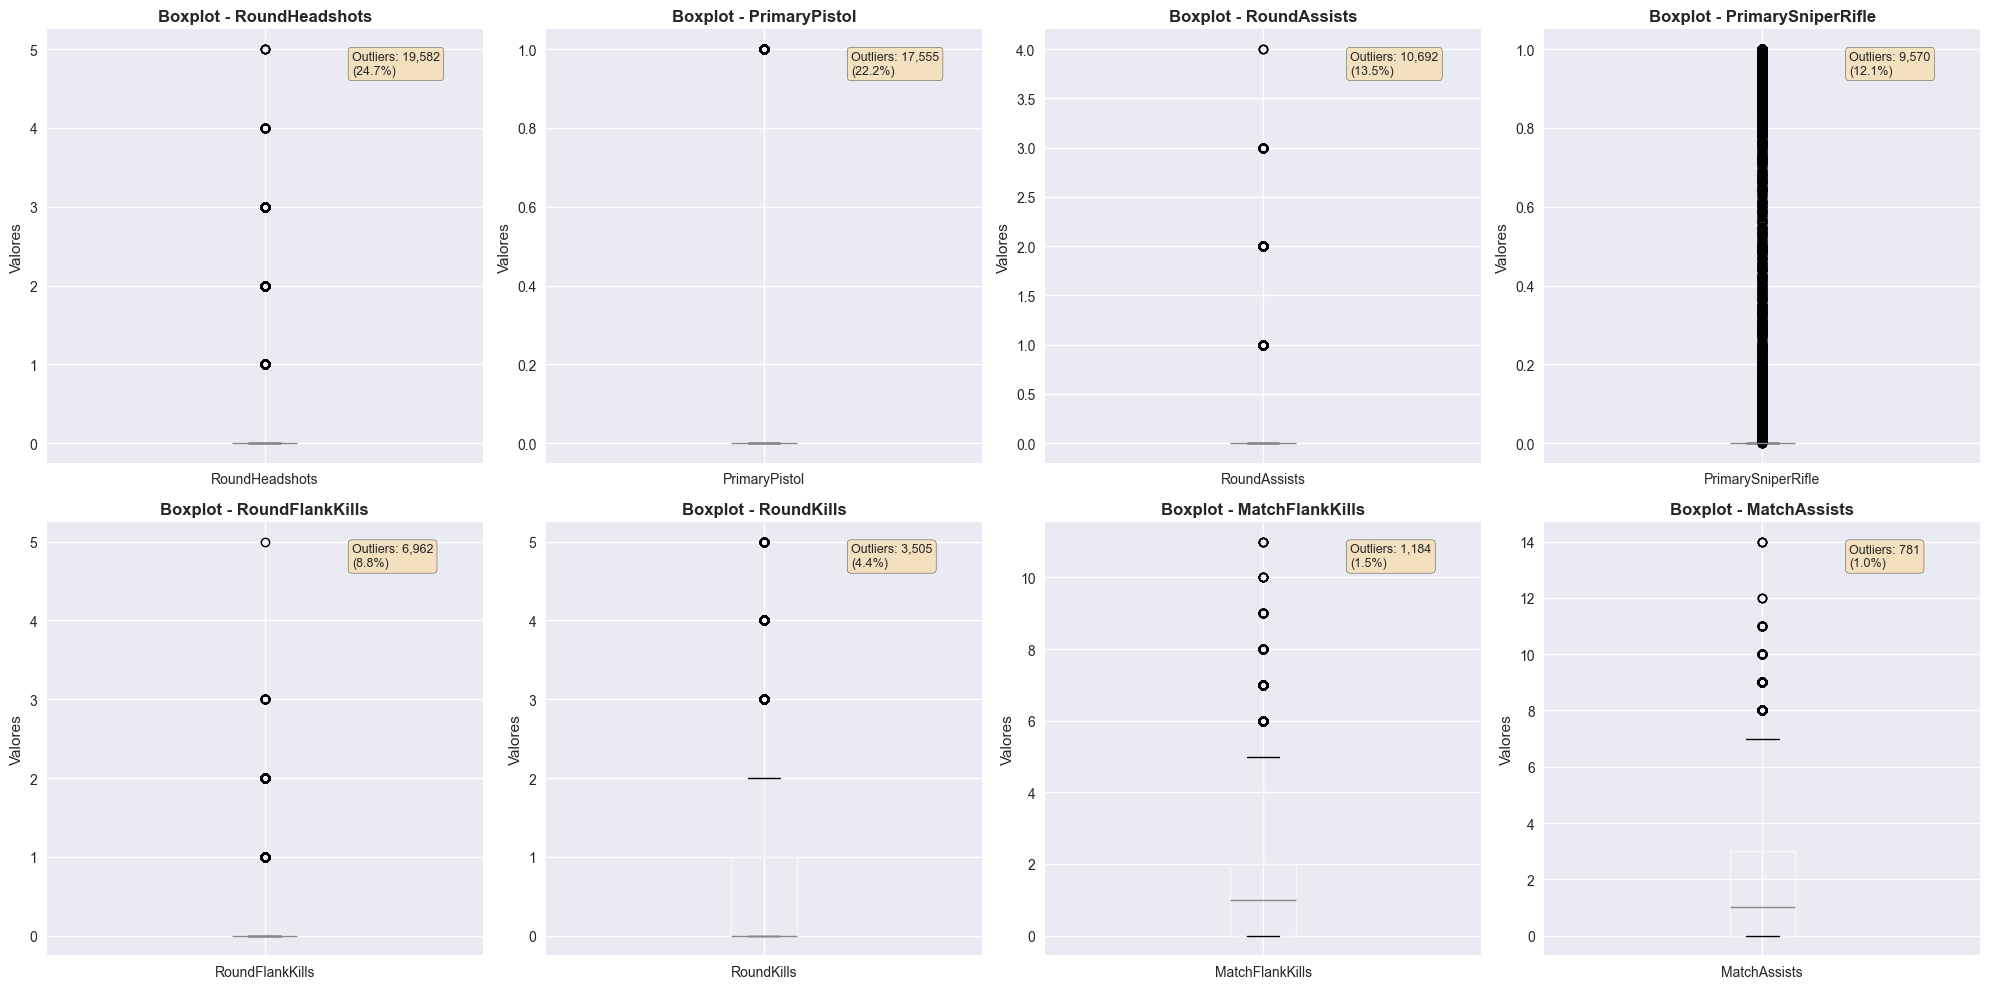

In [87]:
# Visualización de outliers con boxplots
print("VISUALIZACIÓN DE OUTLIERS - BOXPLOTS:")
print("="*45)

# Seleccionar columnas con más outliers para visualizar
top_outlier_cols = outlier_df.head(8)['Column'].tolist() if len(outlier_df) > 0 else numeric_cols[:8]

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, col in enumerate(top_outlier_cols[:8]):
    # Boxplot
    df_clean.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Boxplot - {col}', fontweight='bold')
    axes[i].set_ylabel('Valores')
    
    # Añadir información de outliers
    if col in outlier_df['Column'].values:
        outlier_info = outlier_df[outlier_df['Column'] == col].iloc[0]
        axes[i].text(0.7, 0.95, f"Outliers: {outlier_info['Outlier_Count']:,}\n({outlier_info['Outlier_Percentage']:.1f}%)", 
                    transform=axes[i].transAxes, fontsize=9, 
                    verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

In [88]:
# Análisis detallado de outliers extremos
print("ANÁLISIS DETALLADO DE OUTLIERS EXTREMOS:")
print("="*50)

# Identificar variables con outliers muy extremos
extreme_outlier_cols = []

for col in numeric_cols:
    q99 = df_clean[col].quantile(0.99)
    q01 = df_clean[col].quantile(0.01)
    max_val = df_clean[col].max()
    min_val = df_clean[col].min()
    
    # Si el valor máximo es mucho mayor que el percentil 99
    if max_val > q99 * 2:
        extreme_outlier_cols.append(col)
        print(f"\n{col} - OUTLIERS EXTREMOS:")
        print(f"   Percentil 99: {q99:.2f}")
        print(f"   Valor máximo: {max_val:.2f}")
        print(f"   Ratio max/p99: {max_val/q99:.2f}" if q99 > 0 else "   Ratio max/p99: N/A")
        
        # Mostrar los valores más extremos
        extreme_values = df_clean[df_clean[col] > q99].nlargest(5, col)[col]
        print(f"   Top 5 valores extremos: {extreme_values.tolist()}")

if len(extreme_outlier_cols) == 0:
    print("✅ No se detectaron outliers extremos significativos")

ANÁLISIS DETALLADO DE OUTLIERS EXTREMOS:

PrimaryHeavy - OUTLIERS EXTREMOS:
   Percentil 99: 0.00
   Valor máximo: 1.00
   Ratio max/p99: N/A
   Top 5 valores extremos: [1.0, 1.0, 1.0, 1.0, 1.0]

PrimarySMG - OUTLIERS EXTREMOS:
   Percentil 99: 0.00
   Valor máximo: 1.00
   Ratio max/p99: N/A
   Top 5 valores extremos: [1.0, 1.0, 1.0, 1.0, 1.0]

RoundHeadshots - OUTLIERS EXTREMOS:
   Percentil 99: 2.00
   Valor máximo: 5.00
   Ratio max/p99: 2.50
   Top 5 valores extremos: [5, 5, 5, 5, 5]

RoundFlankKills - OUTLIERS EXTREMOS:
   Percentil 99: 1.00
   Valor máximo: 5.00
   Ratio max/p99: 5.00
   Top 5 valores extremos: [5, 3, 3, 3, 3]


## 9. Correlaciones entre Variables

ANÁLISIS DE CORRELACIONES:

Correlaciones altas encontradas (|r| > 0.7):


,Variable_1,Variable_2,Correlation
3,RoundStartingEquipmentValue,TeamStartingEquipmentValue,0.922943
4,MatchKills,MatchHeadshots,0.831445
2,PrimaryPistol,TeamStartingEquipmentValue,-0.828600
1,PrimaryPistol,RoundStartingEquipmentValue,-0.792872
0,PrimaryAssaultRifle,PrimaryPistol,-0.776840


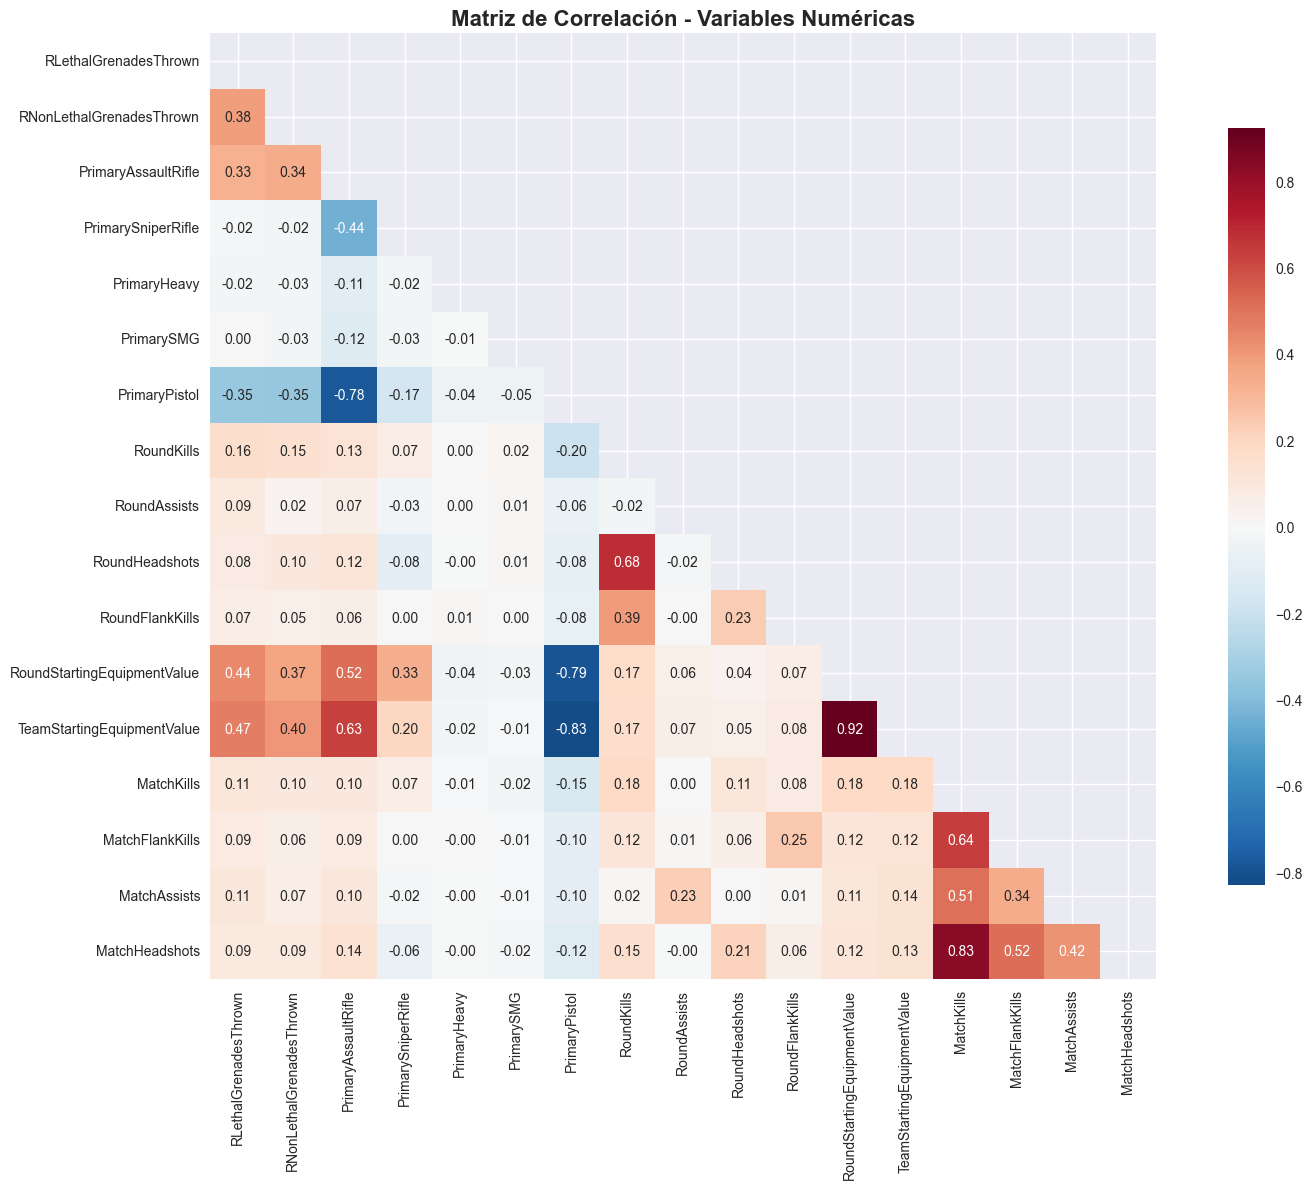

In [89]:
# Matriz de correlación
print("ANÁLISIS DE CORRELACIONES:")
print("="*35)

# Calcular matriz de correlación
correlation_matrix = df_clean[numeric_cols].corr()

# Encontrar correlaciones altas
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:  # Correlación alta
            high_corr_pairs.append({
                'Variable_1': correlation_matrix.columns[i],
                'Variable_2': correlation_matrix.columns[j],
                'Correlation': corr_val
            })

print(f"\nCorrelaciones altas encontradas (|r| > 0.7):")
if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Correlation', key=abs, ascending=False)
    display(high_corr_df)
else:
    print("No se encontraron correlaciones muy altas")

# Visualización de la matriz de correlación
plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Máscara para mostrar solo triángulo inferior
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdBu_r', 
            center=0, 
            mask=mask,
            square=True, 
            fmt='.2f',
            cbar_kws={'shrink': 0.8})
plt.title('Matriz de Correlación - Variables Numéricas', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [90]:
# Top correlaciones positivas y negativas
print("\nTOP CORRELACIONES:")
print("="*25)

# Crear lista de todas las correlaciones (excluyendo diagonal)
all_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        all_correlations.append({
            'Pair': f"{correlation_matrix.columns[i]} - {correlation_matrix.columns[j]}",
            'Correlation': correlation_matrix.iloc[i, j]
        })

all_corr_df = pd.DataFrame(all_correlations)

# Top 10 correlaciones positivas
top_positive = all_corr_df.nlargest(10, 'Correlation')
print("\n🔺 Top 10 Correlaciones Positivas:")
for _, row in top_positive.iterrows():
    print(f"   {row['Pair']}: {row['Correlation']:.3f}")

# Top 10 correlaciones negativas
top_negative = all_corr_df.nsmallest(10, 'Correlation')
print("\n🔻 Top 10 Correlaciones Negativas:")
for _, row in top_negative.iterrows():
    print(f"   {row['Pair']}: {row['Correlation']:.3f}")


TOP CORRELACIONES:

🔺 Top 10 Correlaciones Positivas:
   RoundStartingEquipmentValue - TeamStartingEquipmentValue: 0.923
   MatchKills - MatchHeadshots: 0.831
   RoundKills - RoundHeadshots: 0.679
   MatchKills - MatchFlankKills: 0.642
   PrimaryAssaultRifle - TeamStartingEquipmentValue: 0.628
   PrimaryAssaultRifle - RoundStartingEquipmentValue: 0.519
   MatchFlankKills - MatchHeadshots: 0.516
   MatchKills - MatchAssists: 0.510
   RLethalGrenadesThrown - TeamStartingEquipmentValue: 0.467
   RLethalGrenadesThrown - RoundStartingEquipmentValue: 0.439

🔻 Top 10 Correlaciones Negativas:
   PrimaryPistol - TeamStartingEquipmentValue: -0.829
   PrimaryPistol - RoundStartingEquipmentValue: -0.793
   PrimaryAssaultRifle - PrimaryPistol: -0.777
   PrimaryAssaultRifle - PrimarySniperRifle: -0.441
   RNonLethalGrenadesThrown - PrimaryPistol: -0.353
   RLethalGrenadesThrown - PrimaryPistol: -0.349
   PrimaryPistol - RoundKills: -0.195
   PrimarySniperRifle - PrimaryPistol: -0.171
   PrimaryPist

## 10. Conversión de Tipos de Datos

In [91]:
# Análisis y conversión de tipos de datos
print("CONVERSIÓN DE TIPOS DE DATOS:")
print("="*40)

# Hacer copia para conversiones
df_converted = df_clean.copy()

# 1. Convertir variables categóricas a category
categorical_for_conversion = ['Map', 'Team']
print("\nConversión a tipo 'category':")
for col in categorical_for_conversion:
    if col in df_converted.columns:
        original_memory = df_converted[col].memory_usage(deep=True)
        df_converted[col] = df_converted[col].astype('category')
        new_memory = df_converted[col].memory_usage(deep=True)
        memory_saved = original_memory - new_memory
        print(f"   {col}: {original_memory} → {new_memory} bytes (ahorro: {memory_saved} bytes)")

# 2. Convertir variables que deberían ser enteros
int_columns = ['RoundId', 'MatchId', 'InternalTeamId', 'RLethalGrenadesThrown', 
               'RNonLethalGrenadesThrown', 'RoundKills', 'RoundAssists', 
               'RoundHeadshots', 'RoundFlankKills', 'MatchKills', 'MatchFlankKills', 
               'MatchAssists', 'MatchHeadshots', 'RoundStartingEquipmentValue', 
               'TeamStartingEquipmentValue']

print("\nConversión a tipo 'int':")
for col in int_columns:
    if col in df_converted.columns:
        try:
            original_type = df_converted[col].dtype
            df_converted[col] = pd.to_numeric(df_converted[col], errors='coerce').astype('Int64')
            print(f"   {col}: {original_type} → Int64")
        except Exception as e:
            print(f"    Error en {col}: {e}")

# 3. Convertir Primary Weapon columns a float
weapon_columns = [col for col in df_converted.columns if col.startswith('Primary')]
print("\nConversión de columnas de armas a 'float':")
for col in weapon_columns:
    try:
        original_type = df_converted[col].dtype
        df_converted[col] = pd.to_numeric(df_converted[col], errors='coerce')
        print(f"   {col}: {original_type} → float64")
        
        # Verificar rango de valores
        min_val, max_val = df_converted[col].min(), df_converted[col].max()
        print(f"      Rango: [{min_val:.3f}, {max_val:.3f}]")
    except Exception as e:
        print(f"    Error en {col}: {e}")

print(f"\nConversiones completadas")
print(f"Información después de conversiones:")
print(df_converted.dtypes)

CONVERSIÓN DE TIPOS DE DATOS:

Conversión a tipo 'category':
   Map: 5842844 → 712820 bytes (ahorro: 5130024 bytes)
   Team: 6134337 → 712633 bytes (ahorro: 5421704 bytes)

Conversión a tipo 'int':
   RoundId: int64 → Int64
   InternalTeamId: int64 → Int64
   RLethalGrenadesThrown: int64 → Int64
   RNonLethalGrenadesThrown: int64 → Int64
   RoundKills: int64 → Int64
   RoundAssists: int64 → Int64
   RoundHeadshots: int64 → Int64
   RoundFlankKills: int64 → Int64
   MatchKills: int64 → Int64
   MatchFlankKills: int64 → Int64
   MatchAssists: int64 → Int64
   MatchHeadshots: int64 → Int64
   RoundStartingEquipmentValue: int64 → Int64
   TeamStartingEquipmentValue: int64 → Int64

Conversión de columnas de armas a 'float':
   PrimaryAssaultRifle: float64 → float64
      Rango: [0.000, 1.000]
   PrimarySniperRifle: float64 → float64
      Rango: [0.000, 1.000]
   PrimaryHeavy: float64 → float64
      Rango: [0.000, 1.000]
   PrimarySMG: float64 → float64
      Rango: [0.000, 1.000]
   Prima

## 11. Encoding de Variables Categóricas

In [92]:
# Preparar datos para encoding
print("ENCODING DE VARIABLES CATEGÓRICAS:")
print("="*45)

df_encoded = df_converted.copy()

# 1. Label Encoding para variables binarias
print("\nLabel Encoding (variables binarias):")
binary_cols = ['Team', 'RoundWinner', 'MatchWinner', 'Survived']

label_encoders = {}
for col in binary_cols:
    if col in df_encoded.columns:
        le = LabelEncoder()
        original_values = df_encoded[col].unique()
        df_encoded[col + '_encoded'] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le
        
        print(f"   {col}: {original_values} → {le.classes_}")
        print(f"      Mapping: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# 2. One-Hot Encoding para Map (variable categórica multi-clase)
print("\nOne-Hot Encoding (Map):")
if 'Map' in df_encoded.columns:
    # Crear dummies
    map_dummies = pd.get_dummies(df_encoded['Map'], prefix='Map')
    
    print(f"   Columnas creadas: {list(map_dummies.columns)}")
    print(f"   Dimensiones: {map_dummies.shape}")
    
    # Añadir al dataframe
    df_encoded = pd.concat([df_encoded, map_dummies], axis=1)
    
    # Mostrar ejemplo
    print(f"\n   Ejemplo de encoding:")
    sample_maps = df_encoded[['Map'] + list(map_dummies.columns)].head(8)
    display(sample_maps)

print(f"\nShape después de encoding: {df_encoded.shape}")

ENCODING DE VARIABLES CATEGÓRICAS:

Label Encoding (variables binarias):
   Team: ['Terrorist', 'CounterTerrorist']
Categories (2, object): ['CounterTerrorist', 'Terrorist'] → ['CounterTerrorist' 'Terrorist']
      Mapping: {'CounterTerrorist': np.int64(0), 'Terrorist': np.int64(1)}
   RoundWinner: [False  True] → [False  True]
      Mapping: {np.False_: np.int64(0), np.True_: np.int64(1)}
   MatchWinner: [ True False] → [False  True]
      Mapping: {np.False_: np.int64(0), np.True_: np.int64(1)}
   Survived: [False  True] → [False  True]
      Mapping: {np.False_: np.int64(0), np.True_: np.int64(1)}

One-Hot Encoding (Map):
   Columnas creadas: ['Map_de_dust2', 'Map_de_inferno', 'Map_de_mirage', 'Map_de_nuke']
   Dimensiones: (79154, 4)

   Ejemplo de encoding:


,Map,Map_de_dust2,Map_de_inferno,Map_de_mirage,Map_de_nuke
0,de_inferno,False,True,False,False
1,de_inferno,False,True,False,False
2,de_inferno,False,True,False,False
3,de_inferno,False,True,False,False
4,de_inferno,False,True,False,False
5,de_inferno,False,True,False,False
6,de_inferno,False,True,False,False
7,de_inferno,False,True,False,False



Shape después de encoding: (79154, 32)


VERIFICACIÓN DE BALANCEAMIENTO:

Team_encoded:
   Clase 1: 50.0%
   Clase 0: 50.0%
    Bien balanceado (ratio: 1.00)

RoundWinner_encoded:
   Clase 0: 50.0%
   Clase 1: 50.0%
    Bien balanceado (ratio: 1.00)

MatchWinner_encoded:
   Clase 0: 53.1%
   Clase 1: 46.9%
    Bien balanceado (ratio: 0.88)

Survived_encoded:
   Clase 0: 59.6%
   Clase 1: 40.4%
     Moderadamente balanceado (ratio: 0.68)


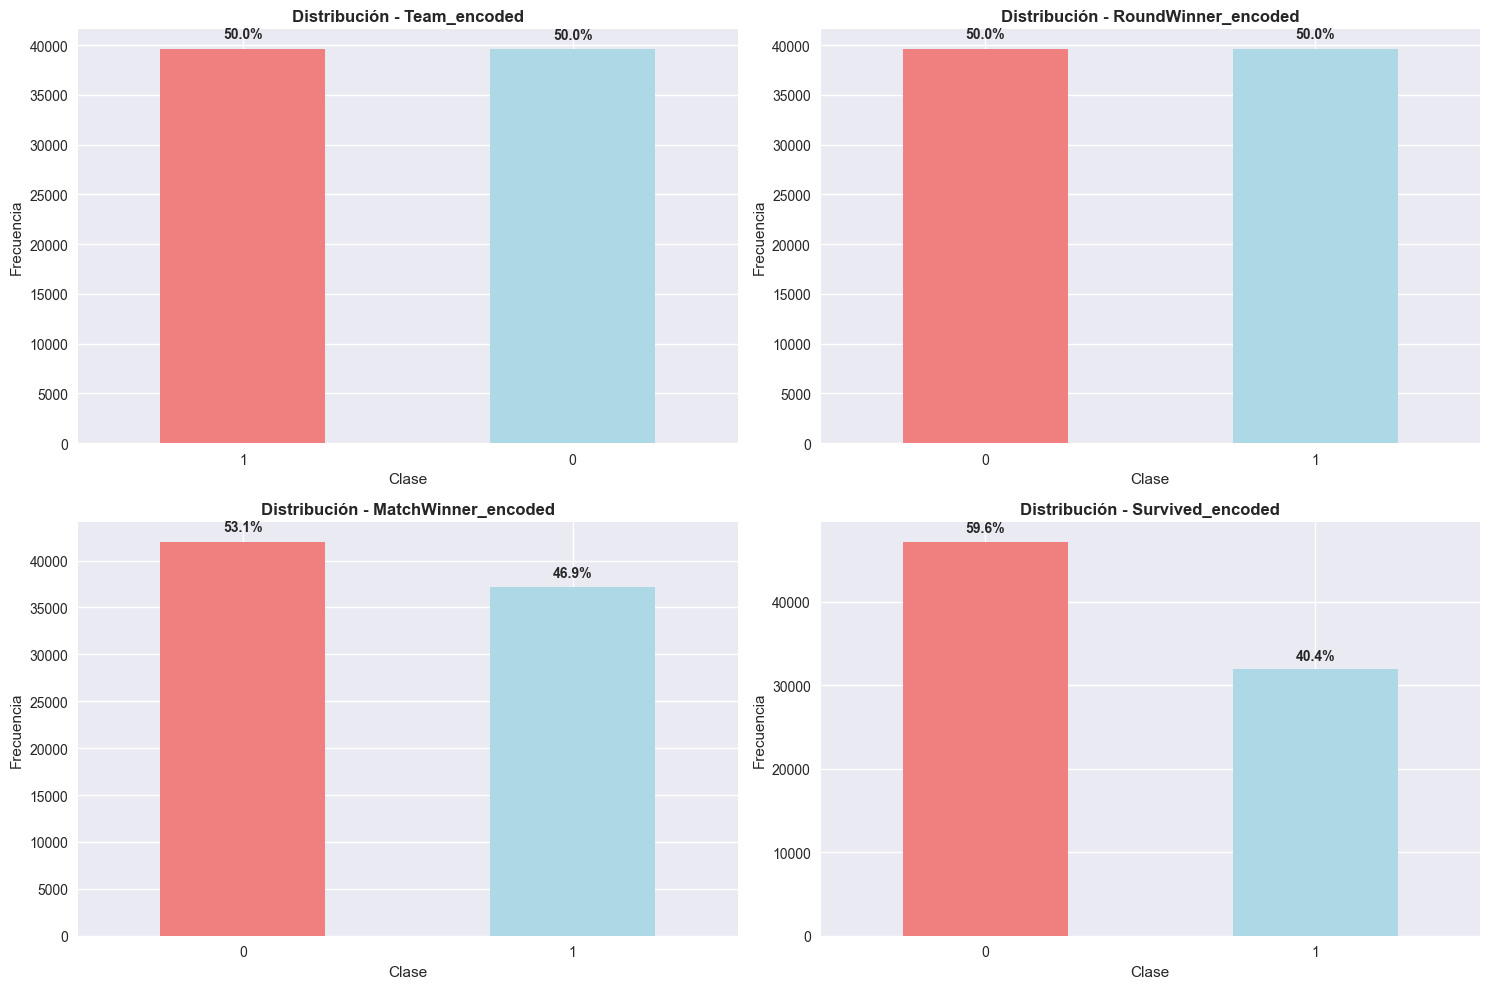

In [93]:
# Verificar balanceamiento después del encoding
print("VERIFICACIÓN DE BALANCEAMIENTO:")
print("="*40)

encoded_binary_cols = [col for col in df_encoded.columns if col.endswith('_encoded')]

for col in encoded_binary_cols:
    distribution = df_encoded[col].value_counts(normalize=True) * 100
    print(f"\n{col}:")
    for value, percentage in distribution.items():
        print(f"   Clase {value}: {percentage:.1f}%")
    
    # Determinar si está balanceado
    min_class = distribution.min()
    max_class = distribution.max()
    balance_ratio = min_class / max_class
    
    if balance_ratio >= 0.8:
        print(f"    Bien balanceado (ratio: {balance_ratio:.2f})")
    elif balance_ratio >= 0.6:
        print(f"     Moderadamente balanceado (ratio: {balance_ratio:.2f})")
    else:
        print(f"    Desbalanceado (ratio: {balance_ratio:.2f}) - Considerar técnicas de balanceo")

# Visualización del balanceamiento
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(encoded_binary_cols[:4]):
    distribution = df_encoded[col].value_counts()
    distribution.plot(kind='bar', ax=axes[i], color=['lightcoral', 'lightblue'])
    axes[i].set_title(f'Distribución - {col}', fontweight='bold')
    axes[i].set_xlabel('Clase')
    axes[i].set_ylabel('Frecuencia')
    axes[i].tick_params(axis='x', rotation=0)
    
    # Añadir porcentajes
    total = distribution.sum()
    for j, v in enumerate(distribution.values):
        axes[i].text(j, v + total*0.01, f'{v/total*100:.1f}%', 
                    ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## 12. Normalización y Escalado

In [94]:
# Preparar datos para normalización
print("NORMALIZACIÓN Y ESCALADO:")
print("="*35)

# Seleccionar columnas numéricas para escalar (excluyendo las encoded y IDs)
cols_to_scale = [col for col in df_encoded.select_dtypes(include=[np.number]).columns 
                if not col.endswith('_encoded') and 'Id' not in col and 'Unnamed' not in col]

print(f"\nColumnas a escalar ({len(cols_to_scale)}):")
for col in cols_to_scale:
    print(f"   - {col}")

# Crear copia para escalado
df_scaled = df_encoded.copy()

# Aplicar StandardScaler
scaler = StandardScaler()
df_scaled[cols_to_scale] = scaler.fit_transform(df_encoded[cols_to_scale])

print(f"\nEscalado aplicado usando StandardScaler")
print(f"Estadísticas después del escalado:")
scaling_stats = df_scaled[cols_to_scale].describe()
display(scaling_stats.round(3))

# Verificar que la media sea ~0 y std ~1
print(f"\nVerificación del escalado:")
means = df_scaled[cols_to_scale].mean()
stds = df_scaled[cols_to_scale].std()

print(f"Media promedio: {means.mean():.6f} (debería ser ~0)")
print(f"Desviación estándar promedio: {stds.mean():.6f} (debería ser ~1)")

# Guardar el scaler para uso futuro
import pickle
with open('../data/02_intermediate/standard_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print(f"\nScaler guardado en: ../data/02_intermediate/standard_scaler.pkl")

NORMALIZACIÓN Y ESCALADO:

Columnas a escalar (17):
   - RLethalGrenadesThrown
   - RNonLethalGrenadesThrown
   - PrimaryAssaultRifle
   - PrimarySniperRifle
   - PrimaryHeavy
   - PrimarySMG
   - PrimaryPistol
   - RoundKills
   - RoundAssists
   - RoundHeadshots
   - RoundFlankKills
   - RoundStartingEquipmentValue
   - TeamStartingEquipmentValue
   - MatchKills
   - MatchFlankKills
   - MatchAssists
   - MatchHeadshots

Escalado aplicado usando StandardScaler
Estadísticas después del escalado:


,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
count,79154.000,79154.000,79154.000,79154.000,79154.000,79154.000,79154.000,79154.000,79154.000,79154.000,79154.000,79154.000,79154.000,79154.000,79154.000,79154.000,79154.000
mean,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-0.834,-1.062,-1.455,-0.321,-0.079,-0.085,-0.534,-0.761,-0.379,-0.521,-0.298,-1.790,-1.939,-1.374,-0.843,-1.028,-1.188
25%,-0.834,-1.062,-1.455,-0.321,-0.079,-0.085,-0.534,-0.761,-0.379,-0.521,-0.298,-1.032,-0.820,-0.890,-0.843,-1.028,-0.880
50%,-0.834,-0.218,0.699,-0.321,-0.079,-0.085,-0.534,-0.761,-0.379,-0.521,-0.298,0.437,0.376,-0.083,-0.146,-0.480,-0.264
75%,0.838,0.626,0.699,-0.321,-0.079,-0.085,-0.534,0.373,-0.379,-0.521,-0.298,0.673,0.735,0.724,0.550,0.617,0.660
max,5.855,4.002,0.699,3.253,13.166,12.054,1.873,4.909,9.994,8.117,15.295,2.402,1.771,5.244,6.822,6.647,5.588



Verificación del escalado:
Media promedio: 0.000000 (debería ser ~0)
Desviación estándar promedio: 1.000006 (debería ser ~1)

Scaler guardado en: ../data/02_intermediate/standard_scaler.pkl


COMPARACIÓN ANTES VS DESPUÉS DEL ESCALADO:


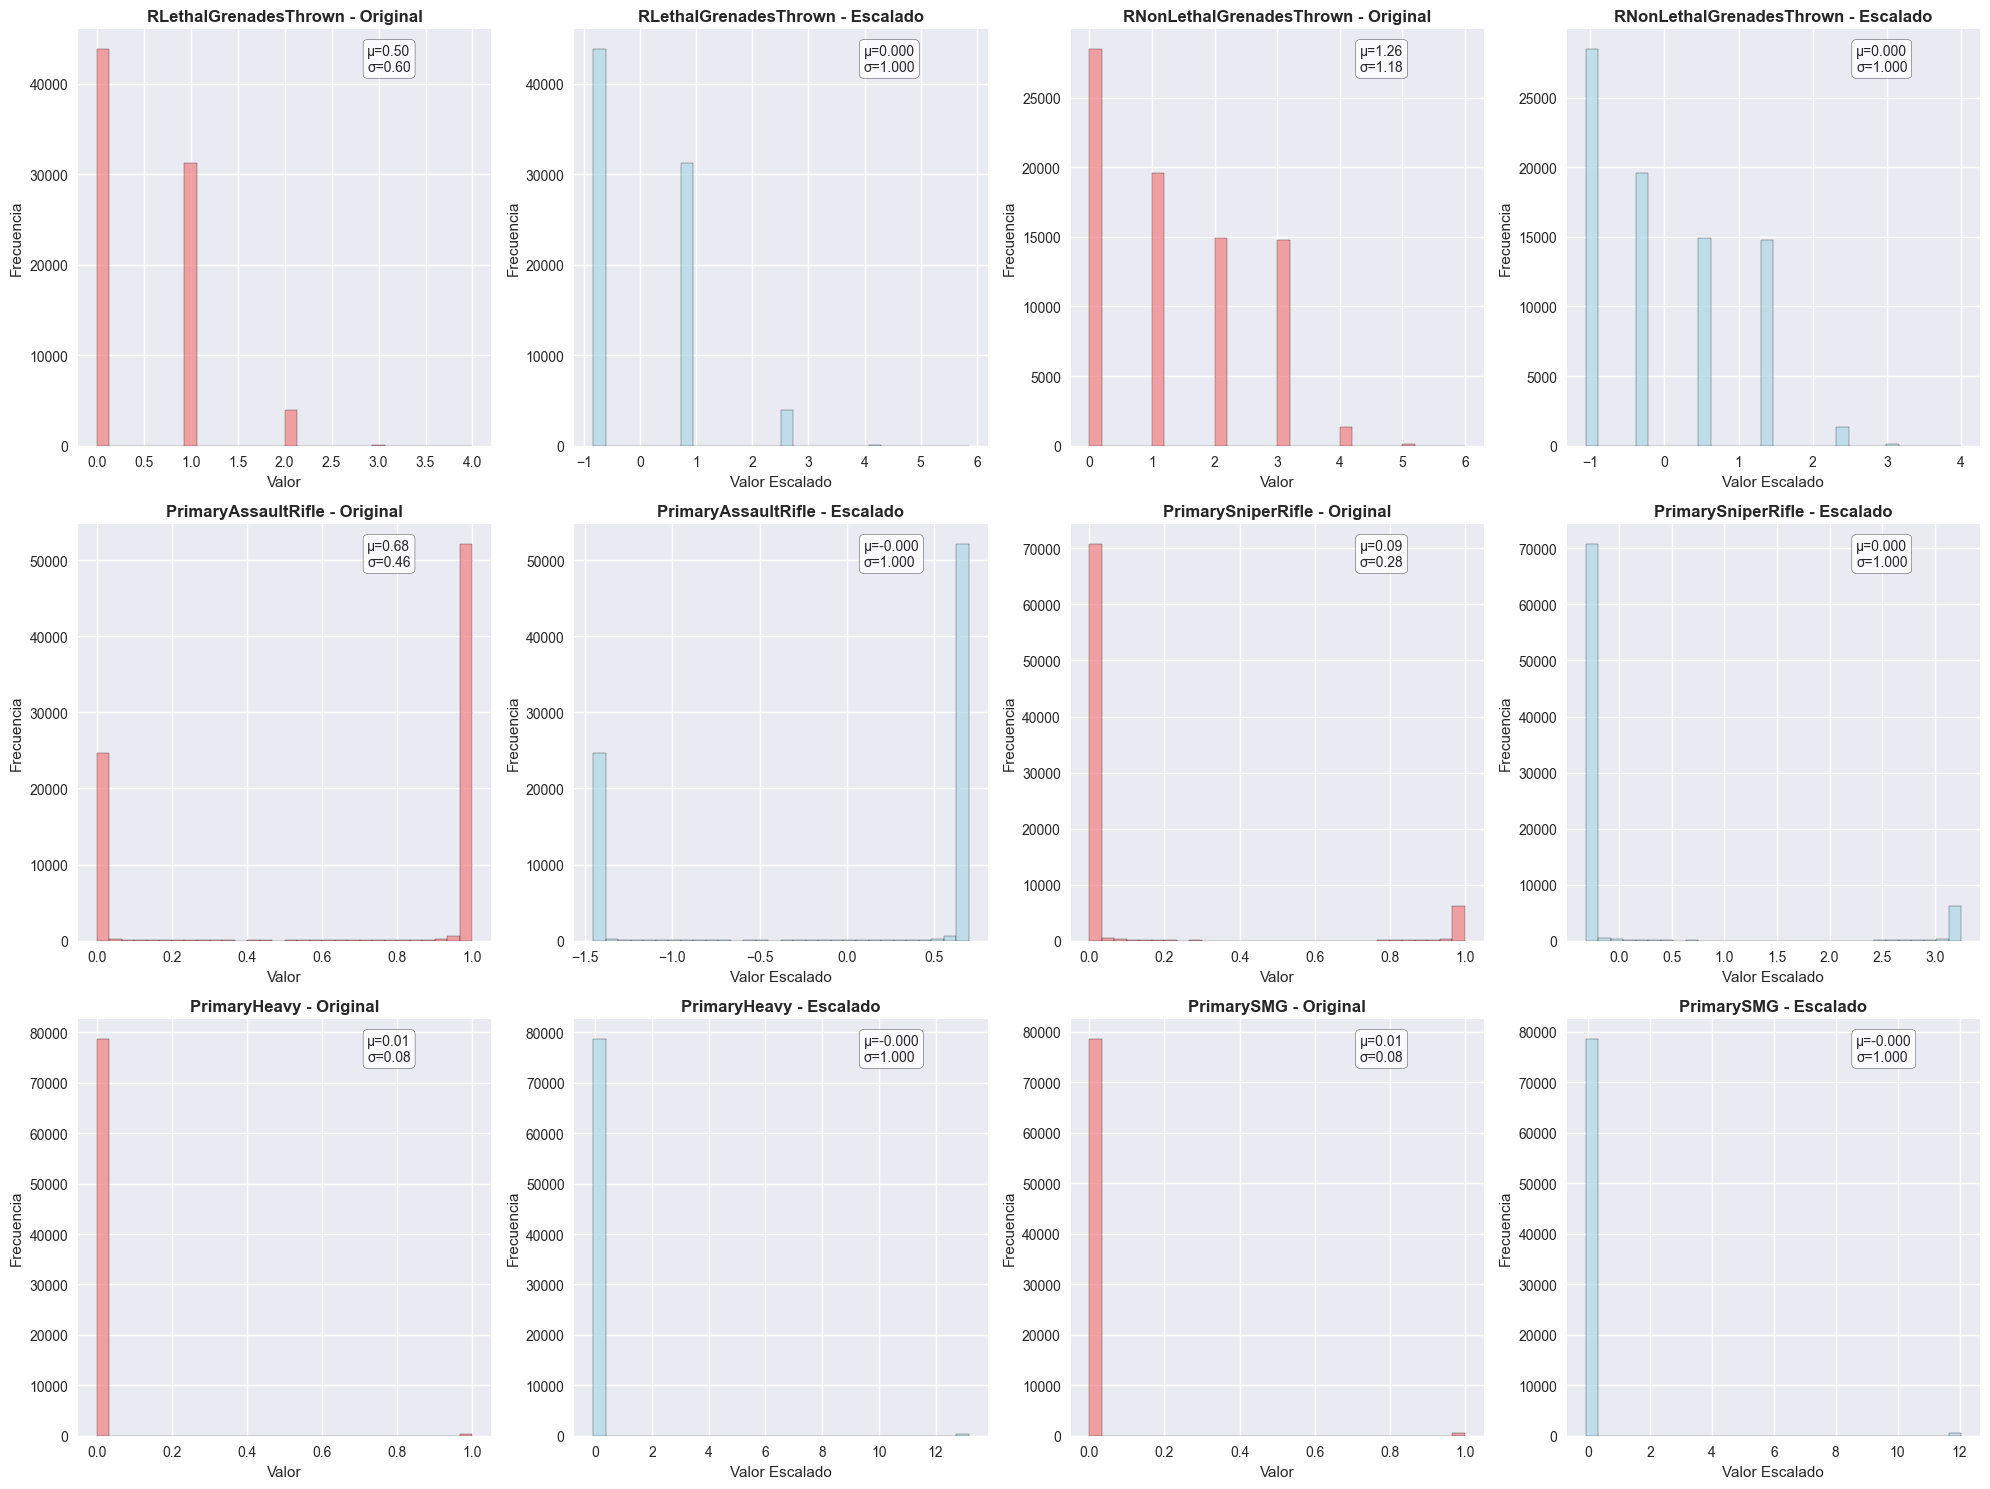

In [95]:
# Visualización antes vs después del escalado
print("COMPARACIÓN ANTES VS DESPUÉS DEL ESCALADO:")
print("="*50)

# Seleccionar algunas columnas para visualizar
sample_cols = cols_to_scale[:6]  # Primeras 6 columnas

fig, axes = plt.subplots(3, 4, figsize=(20, 15))

for i, col in enumerate(sample_cols):
    # Gráfico original
    row = i // 2
    col_idx = (i % 2) * 2
    
    # Distribución original
    df_encoded[col].hist(bins=30, alpha=0.7, ax=axes[row, col_idx], 
                        color='lightcoral', edgecolor='black')
    axes[row, col_idx].set_title(f'{col} - Original', fontweight='bold')
    axes[row, col_idx].set_xlabel('Valor')
    axes[row, col_idx].set_ylabel('Frecuencia')
    
    # Distribución escalada
    df_scaled[col].hist(bins=30, alpha=0.7, ax=axes[row, col_idx + 1], 
                       color='lightblue', edgecolor='black')
    axes[row, col_idx + 1].set_title(f'{col} - Escalado', fontweight='bold')
    axes[row, col_idx + 1].set_xlabel('Valor Escalado')
    axes[row, col_idx + 1].set_ylabel('Frecuencia')
    
    # Añadir estadísticas
    orig_mean, orig_std = df_encoded[col].mean(), df_encoded[col].std()
    scaled_mean, scaled_std = df_scaled[col].mean(), df_scaled[col].std()
    
    axes[row, col_idx].text(0.7, 0.9, f'μ={orig_mean:.2f}\nσ={orig_std:.2f}', 
                           transform=axes[row, col_idx].transAxes, 
                           bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    axes[row, col_idx + 1].text(0.7, 0.9, f'μ={scaled_mean:.3f}\nσ={scaled_std:.3f}', 
                               transform=axes[row, col_idx + 1].transAxes, 
                               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

## 13. Guardado de Datos Procesados

In [96]:
# Guardar diferentes versiones de los datos procesados
print("GUARDADO DE DATOS PROCESADOS:")
print("="*40)

# 1. Datos limpios (sin escalado)
clean_path = '../data/02_intermediate/csgo_data_clean.csv'
df_encoded.to_csv(clean_path, index=False)
print(f"Datos limpios guardados en: {clean_path}")
print(f"   Shape: {df_encoded.shape}")
print(f"   Tamaño: {df_encoded.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# 2. Datos escalados (listos para ML)
scaled_path = '../data/03_primary/csgo_data_ml_ready.csv'
df_scaled.to_csv(scaled_path, index=False)
print(f"\nDatos escalados guardados en: {scaled_path}")
print(f"   Shape: {df_scaled.shape}")
print(f"   Tamaño: {df_scaled.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# 3. Guardar metadatos del procesamiento
metadata = {
    'original_shape': df_raw.shape,
    'final_shape': df_scaled.shape,
    'columns_dropped': cols_dropped,
    'columns_scaled': cols_to_scale,
    'encoding_mappings': {
        col: {str(k): int(v) for k, v in zip(le.classes_, le.transform(le.classes_))}
        for col, le in label_encoders.items()
    },
    'categorical_columns': list(map_dummies.columns),
    'outlier_summary': outlier_df.to_dict('records') if len(outlier_df) > 0 else []
}

import json
metadata_path = '../data/02_intermediate/processing_metadata.json'
with open(metadata_path, 'w') as f:
    json.dump(metadata, f, indent=2, default=str)
print(f"\nMetadatos guardados en: {metadata_path}")

print(f"\nRESUMEN FINAL DEL PROCESAMIENTO:")
print(f"="*45)
print(f"Filas originales: {df_raw.shape[0]:,}")
print(f"Filas finales: {df_scaled.shape[0]:,}")
print(f"Columnas originales: {df_raw.shape[1]}")
print(f"Columnas finales: {df_scaled.shape[1]}")
print(f"Columnas eliminadas: {len(cols_dropped)}")
print(f"Variables con encoding: {len(label_encoders) + 1}")  # +1 for Map
print(f"Variables escaladas: {len(cols_to_scale)}")
print(f"\n¡Datos listos para Machine Learning!")

GUARDADO DE DATOS PROCESADOS:
Datos limpios guardados en: ../data/02_intermediate/csgo_data_clean.csv
   Shape: (79154, 32)
   Tamaño: 16.23 MB

Datos escalados guardados en: ../data/03_primary/csgo_data_ml_ready.csv
   Shape: (79154, 32)
   Tamaño: 15.32 MB

Metadatos guardados en: ../data/02_intermediate/processing_metadata.json

RESUMEN FINAL DEL PROCESAMIENTO:
Filas originales: 79,157
Filas finales: 79,154
Columnas originales: 30
Columnas finales: 32
Columnas eliminadas: 6
Variables con encoding: 5
Variables escaladas: 17

¡Datos listos para Machine Learning!


## 14. Resumen Ejecutivo del EDA

In [97]:
# Generar reporte final
print("RESUMEN EJECUTIVO - EXPLORATORY DATA ANALYSIS")
print("="*60)

print("\nOBJETIVOS COMPLETADOS:")
objectives = [
    " Carga y exploración inicial de datos",
    " Identificación y eliminación de columnas problemáticas",
    " Limpieza de valores inconsistentes",
    " Análisis de variables categóricas y numéricas",
    " Detección y análisis de outliers",
    " Análisis de correlaciones",
    " Conversión de tipos de datos",
    " Encoding de variables categóricas",
    " Normalización y escalado",
    " Guardado de datos procesados"
]

for obj in objectives:
    print(f"   {obj}")

print("\nHALLAZGOS CLAVE:")
findings = [
    f"• Dataset: {df_scaled.shape[0]:,} registros × {df_scaled.shape[1]} variables",
    f"• Partidas analizadas: 333 matches en 4 mapas",
    f"• Variables problemáticas eliminadas: {len(cols_dropped)}",
    f"• Variables categóricas codificadas: {len(label_encoders) + 1}",
    f"• Variables con outliers detectados: {len(outlier_df) if len(outlier_df) > 0 else 0}",
    f"• Correlaciones altas encontradas: {len(high_corr_pairs) if 'high_corr_pairs' in locals() else 0}",
    f"• Dataset balanceado para clasificación: Sí (mayoría de variables)"
]

for finding in findings:
    print(f"   {finding}")

print("\nPROBLEMAS IDENTIFICADOS Y RESUELTOS:")
problems_solved = [
    "• TimeAlive, TravelledDistance: Formato europeo corrupto → ELIMINADAS",
    "• RoundWinner: Valor 'False4' inconsistente → CORREGIDO",
    "• MatchWinner: Valores NaN → ELIMINADOS",
    "• Primary Weapons: Tipos de datos mixtos → CONVERTIDOS a float",
    "• Variables categóricas: Formato string → ENCODED apropiadamente"
]

for problem in problems_solved:
    print(f"   {problem}")

print("\nDATOS LISTOS PARA:")
ml_ready = [
    " Modelos de Clasificación (Survived, RoundWinner, MatchWinner)",
    " Modelos de Regresión (Kills, Assists, Equipment Values)",
    " Análisis de clustering y segmentación",
    " Feature engineering avanzado",
    " Validación cruzada y evaluación de modelos"
]

for ready in ml_ready:
    print(f"   {ready}")

print("\nARCHIVOS GENERADOS:")
files_generated = [
    " csgo_data_clean.csv - Datos limpios sin escalado",
    " csgo_data_ml_ready.csv - Datos escalados para ML",
    " standard_scaler.pkl - Scaler para nuevos datos",
    " processing_metadata.json - Metadatos del procesamiento"
]

for file_info in files_generated:
    print(f"   {file_info}")

print("\n PRÓXIMOS PASOS RECOMENDADOS:")
next_steps = [
    "1. Feature Engineering: Crear variables derivadas (ratios, interactions)",
    "2. Modelado: Implementar algoritmos de clasificación y regresión",
    "3. Validación: Cross-validation con split temporal por MatchId",
    "4. Optimización: Hyperparameter tuning y ensemble methods",
    "5. Evaluación: Métricas específicas por tipo de problema"
]

for step in next_steps:
    print(f"   {step}")

print("\n" + "="*60)
print(" DATA PREPARATION COMPLETADO EXITOSAMENTE")
print("="*60)

RESUMEN EJECUTIVO - EXPLORATORY DATA ANALYSIS

OBJETIVOS COMPLETADOS:
    Carga y exploración inicial de datos
    Identificación y eliminación de columnas problemáticas
    Limpieza de valores inconsistentes
    Análisis de variables categóricas y numéricas
    Detección y análisis de outliers
    Análisis de correlaciones
    Conversión de tipos de datos
    Encoding de variables categóricas
    Normalización y escalado
    Guardado de datos procesados

HALLAZGOS CLAVE:
   • Dataset: 79,154 registros × 32 variables
   • Partidas analizadas: 333 matches en 4 mapas
   • Variables problemáticas eliminadas: 6
   • Variables categóricas codificadas: 5
   • Variables con outliers detectados: 14
   • Correlaciones altas encontradas: 5
   • Dataset balanceado para clasificación: Sí (mayoría de variables)

PROBLEMAS IDENTIFICADOS Y RESUELTOS:
   • TimeAlive, TravelledDistance: Formato europeo corrupto → ELIMINADAS
   • RoundWinner: Valor 'False4' inconsistente → CORREGIDO
   • MatchWinner: Va

In [100]:
numeric_cols = df_scaled.select_dtypes(include=[np.number]).columns.tolist()

ANÁLISIS DE CORRELACIONES:

Correlaciones altas encontradas (|r| > 0.7):


,Variable_1,Variable_2,Correlation
4,RoundStartingEquipmentValue,TeamStartingEquipmentValue,0.922943
5,MatchKills,MatchHeadshots,0.831445
3,PrimaryPistol,TeamStartingEquipmentValue,-0.828600
0,RoundId,MatchKills,0.807490
2,PrimaryPistol,RoundStartingEquipmentValue,-0.792872
1,PrimaryAssaultRifle,PrimaryPistol,-0.776840


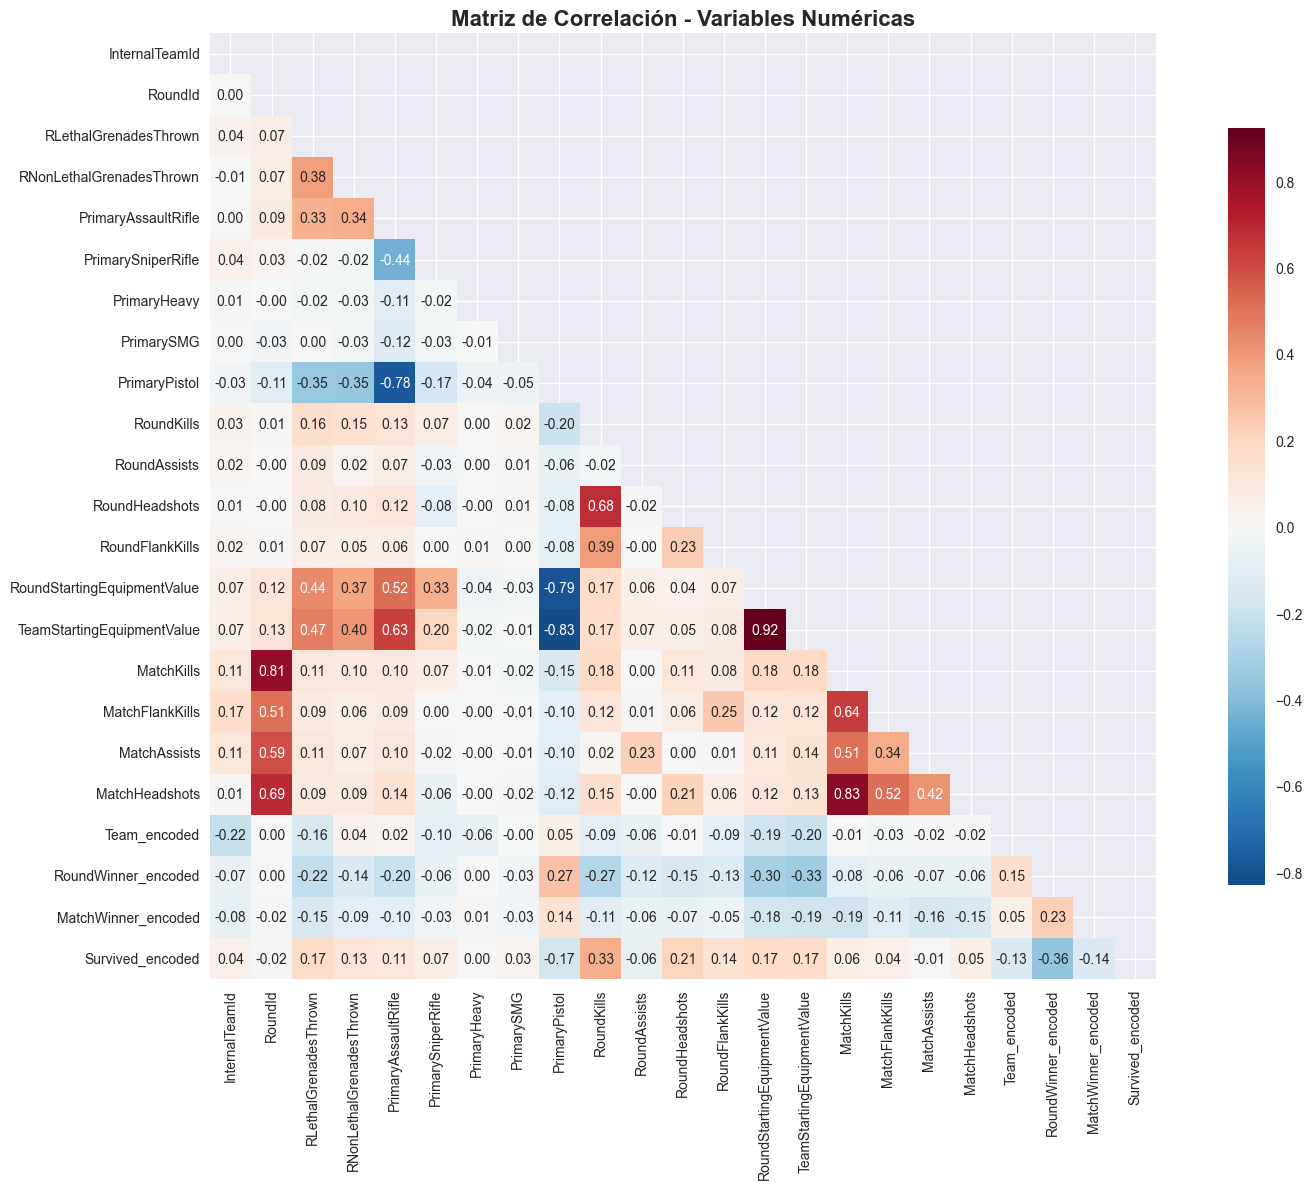

In [101]:
# Matriz de correlación
print("ANÁLISIS DE CORRELACIONES:")
print("="*35)

# Calcular matriz de correlación
correlation_matrix = df_scaled[numeric_cols].corr()

# Encontrar correlaciones altas
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:  # Correlación alta
            high_corr_pairs.append({
                'Variable_1': correlation_matrix.columns[i],
                'Variable_2': correlation_matrix.columns[j],
                'Correlation': corr_val
            })

print(f"\nCorrelaciones altas encontradas (|r| > 0.7):")
if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Correlation', key=abs, ascending=False)
    display(high_corr_df)
else:
    print("No se encontraron correlaciones muy altas")

# Visualización de la matriz de correlación
plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Máscara para mostrar solo triángulo inferior
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdBu_r', 
            center=0, 
            mask=mask,
            square=True, 
            fmt='.2f',
            cbar_kws={'shrink': 0.8})
plt.title('Matriz de Correlación - Variables Numéricas', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()